# 2ª AP de Aprendizado de Máquina

Professor: Regis Pires Magalhães <br/>
Alumo: Michel de Melo Vieira <br/>
Matricula: 389959 <br/>

#### Observações:
- Primeiramente faça uma cópia backup deste arquivo sem suas resoluções.
- A segunda questão vale 1 ponto. As demais questões valem 1,5.
- Desconecte o cabo de rede do computador.
- Somente é permitida consulta à documentação contida na pasta mldocs.
- Não é permitido o uso de pendrive ou qualquer outro meio de armazenamento externo de dados.
- Ao concluir a avaliação, altere o nome do notebook para conter a matricula e o nome do aluno. Somente depois disso, chame o professor para entregar sua resolução, que deverá ser copiada para o pendrive do professor.

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier

## 1. Crie manualmente conjuntos de treino e teste para um 3-Fold a partir dos dados a seguir, onde X representa as features, e y representa os labels.

In [4]:
X = np.array([[-3, 1],
              [ 1, 5], 
              [ 1, 2], 
              [-2, 0], 
              [ 2, 3], 
              [-4, 0], 
              [-1, 1], 
              [ 1, 1], 
              [-2, 2]])
y = np.array([0, 2, 2, 1, 2, 0, 1, 2, 0])

### Resposta:
#### 1 Fold:
```python
X_train = [[-3, 1],[ 1, 5],[ 1, 2],[-2, 0],[ 2, 3],[-4, 0],[-1, 1],[ 1, 1],[-2, 2]]
y_train = []
X_test = [0, 2, 2, 1, 2, 0, 1, 2, 0] 
y_test = []
```

#### 2 Fold:
```python
X_train = [[[-3, 1],[ 1, 5],[ 1, 2],[-2, 0],[ 2, 3]], [[-4, 0],[-1, 1],[ 1, 1],[-2, 2]]]
y_train = [[0, 2, 2, 1, 2],[0, 1, 2, 0]]
X_test = [[[-4, 0],[-1, 1],[ 1, 1],[-2, 2]], [[-3, 1],[ 1, 5],[ 1, 2],[-2, 0],[ 2, 3]]]
y_test = [[0, 1, 2, 0],[0, 2, 2, 1, 2]]
```

#### 3 Fold:
```python
X_train = [[[-2, 0],[ 2, 3],[-4, 0],[-1, 1],[ 1, 1],[-2, 2]], [[-3, 1],[ 1, 5],[ 1, 2],[-1, 1],[ 1, 1],[-2, 2]], [[-3, 1],[ 1, 5],[ 1, 2],[-2, 0],[ 2, 3],[-4, 0]]]
y_train = [[1, 2, 0, 1, 2, 0],[0, 2, 2, 1, 2, 0],[0, 2, 2, 1, 2, 0]]
X_test = [[[-3, 1],[ 1, 5],[ 1, 2]],[[-2, 0],[ 2, 3],[-4, 0]],[[-1, 1],[ 1, 1],[-2, 2]]]
y_test = [[0, 2, 2],[1, 2, 0],[1, 2, 0]]
```

## 2. Desenhe um gráfico de pontos onde, o eixo x é representado pela 1ª coluna de X, o eixo y é presentado pela 2ª coluna de X e os labels 0, 1 e 2 são representados por diferentes cores.

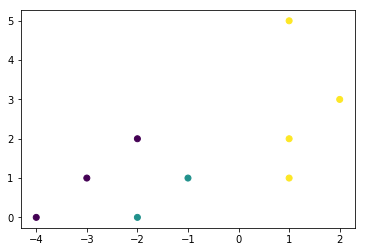

In [8]:
plt.scatter(X[:,0],X[:,1],c=y);

## 3. Dada a amostra [-0.5, 1] e levando em conta as features X e os labels y da questão 1, mas desconsiderando o k-fold, responda: a que classe esta amostra pertence se você usar o kNN com k=2? Prove usando a distância euclidiana entre os 2 pontos visualmente mais próximos. Não é necessário executar a implementação do algoritmo kNN.

In [28]:
# ponto (-2,0)
print(np.sqrt(np.square(np.absolute(-0.5-(-2))) + np.square(np.absolute(1-0))))
# ponto (1,1)
print(np.sqrt(np.square(np.absolute(-0.5-1)) + np.square(np.absolute(1-1))))

1.8027756377319946
1.5


para k=2 a amostra [-0.5,1] pegara dois visinhos de classes distintas, portante, tornasse dificil de classificalo para k2 vizinhos, se levar em consideração o visinho mais prossimo a amostra sera do tipo 1 

# >>> os 2 vizinhos mais próximos são (1,1) e (-1, 1).

## 4. Dado o dataframe df_jogo a seguir, que relaciona o tempo com jogar (1) ou não jogar (0), calcule manualmente a probabilidade de não jogar, dado que está chuvendo.

In [29]:
tempo = np.array(['sol', 'nuvens', 'chuva', 'sol', 'sol', 'nuvens', 'chuva', 'chuva', 'sol', 'chuva'])
jogar = np.array([0, 1, 1, 1, 1, 1, 0, 0, 1, 1])
df_jogo = pd.DataFrame({'tempo': tempo, 'jogar': jogar})
df_jogo

,tempo,jogar
0,sol,0
1,nuvens,1
2,chuva,1
3,sol,1
4,sol,1
5,nuvens,1
6,chuva,0
7,chuva,0
8,sol,1
9,chuva,1


In [55]:
df_jogo_dm = pd.get_dummies(df_jogo, drop_first=True)

In [72]:
df_jogo_dm

,jogar,tempo_nuvens,tempo_sol
0,0,0,1
1,1,1,0
2,1,0,0
3,1,0,1
4,1,0,1
5,1,1,0
6,0,0,0
7,0,0,0
8,1,0,1
9,1,0,0


In [60]:
X = df_jogo_dm.values[:,:-1]
y = df_jogo_dm.values[:,-1]

In [61]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [62]:
GNB = GaussianNB()

In [64]:
GNB.fit(X_train,y_train);

In [78]:
y_pred = GNB.predict_proba(X_test)

In [75]:
np.mean(y_pred)

0.5000000265708967

# >>> O cálculo desta probabilidade não atende às condições solicitadas na questão.

## 5. Transforme o dataframe df_jogo para que a feature categórica não ordenada 'tempo' possa ser melhor usada de modo geral por algoritmos de aprendizado de máquina. No final, você deve ter um dataframe chamado df_transform.

In [76]:
df_trasform = pd.get_dummies(df_jogo, drop_first=True)
df_trasform

,jogar,tempo_nuvens,tempo_sol
0,0,0,1
1,1,1,0
2,1,0,0
3,1,0,1
4,1,0,1
5,1,1,0
6,0,0,0
7,0,0,0
8,1,0,1
9,1,0,0


## 6. Dados os 3 pontos a seguir, calcule as distâncias euclidiana, manhattan e chebyshev entre o primeiro e o último ponto.

In [ ]:
X = np.array([ [0,1], [2,6], [3,2] ])

In [143]:
print('euclidiana')
print(np.sqrt(np.square(np.absolute(0-3)) + np.square(np.absolute(1-2))))
print('manhattan')
print(np.absolute(0-3) + np.absolute(1-2))
print('chebyshev')
print(np.maximum(np.absolute(0-3),np.absolute(1-2)))

euclidiana
3.1622776601683795
manhattan
4
chebyshev
3


## 7. Avalie e compare a acurácia dos algoritmos Logistic Regression, GassianNB, SVM e kNN usando os dados de treino e teste a seguir.

In [92]:
from sklearn import metrics

In [79]:
X, y = datasets.load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(426, 30) (426,) (143, 30) (143,)


In [102]:
modelos= {}
modelos['Logistic Regression'] = {'modelo': LogisticRegression(solver='lbfgs'),'pred':0, 'acuracy':0}
modelos['GassianNB'] = {'modelo': GaussianNB(),'pred':0, 'acuracy':0}
modelos['SVM'] = {'modelo':SVC(gamma='auto'),'pred':0, 'acuracy':0}
modelos['kNN'] = {'modelo':KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree'),'pred':0, 'acuracy':0}

In [103]:
%%time
for modelo in modelos:
    modelos[modelo]['modelo'].fit(X_train,y_train)
    modelos[modelo]['pred'] = modelos[modelo]['modelo'].predict(X_test)

CPU times: user 297 ms, sys: 12.1 ms, total: 309 ms
Wall time: 93.3 ms


/home/aluno/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [104]:
%%time
for modelo in modelos:
    modelos[modelo]['acuracy'] = metrics.accuracy_score(y_test,modelos[modelo]['pred'])

CPU times: user 2.22 ms, sys: 91 µs, total: 2.31 ms
Wall time: 1.47 ms


In [105]:
for modelo in modelos:
    print(modelo,modelos[modelo]['acuracy'])

Logistic Regression 0.958041958041958
GassianNB 0.9370629370629371
SVM 0.6293706293706294
kNN 0.9300699300699301
